In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


In [92]:
#skidanje dataset-a
path = kagglehub.dataset_download("khwaishsaxena/lung-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Zika\.cache\kagglehub\datasets\khwaishsaxena\lung-cancer-dataset\versions\1


In [93]:
#učitavanje datoteke
file_path = 'C:\\Users\\Zika\\Desktop\\skladistenje-softver\\Lung Cancer.csv'
df = pd.read_csv(file_path)

In [94]:
#prikaz prvih 5 redova
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [95]:
# prikaz broja redova
df.shape[0]

890000

In [96]:
# prikaz broja kolona
df.shape[1]

17

In [97]:
# detaljniji prikaz informacija o tipu i broja null podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [98]:
# koriscenje ydata profiliga za analizu i odredjenu vizualizaciju podtaka podataka 
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:  79%|███████▉  | 19/24 [00:28<00:07,  1.50s/it, Calculate auto correlation] 


KeyboardInterrupt: 

In [99]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [100]:
df.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

In [101]:
df.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014127,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# broj umrlih i prezivelih
df['survived'].value_counts()

survived
0    693996
1    196004
Name: count, dtype: int64

In [103]:
# broj razlicith godina
df['age'].nunique()

95

<Axes: >

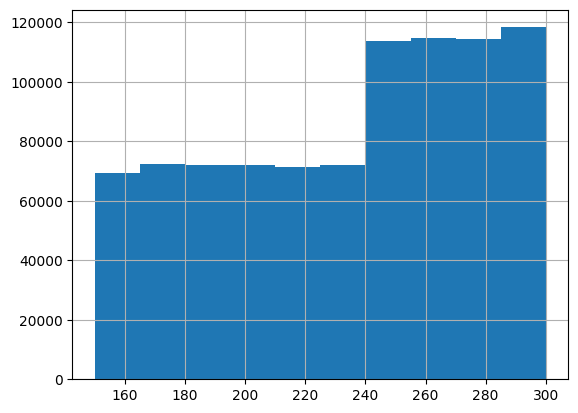

In [104]:
# prikaz levela holesterole
df['cholesterol_level'].hist()

<Axes: xlabel='bmi'>

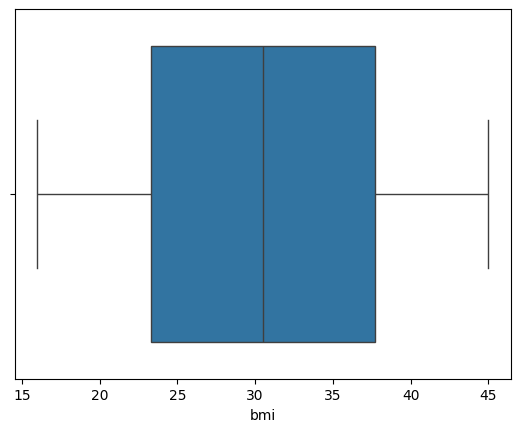

In [105]:
# bmi => body to mass index - masa/visina
# prikaz da vidimo da li ima outlayer-a
# nemamo outlayer-a
# otprilike 50% pacijenta iz dataseta ima 25-35 bmi
sns.boxplot(data=df, x='bmi')

In [106]:
# korelacija izmedju numerickih kolona
df_numeric = df.select_dtypes(include='number').drop(["id"], axis=1) 

df_numeric.corr()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
age,1.000000,0.000915,0.001799,-0.001082,-0.000519,-0.000067,-0.000785,0.001233
bmi,0.000915,1.000000,0.746905,0.001923,0.001662,0.000608,0.000771,0.000007
cholesterol_level,0.001799,0.746905,1.000000,0.002049,0.001263,0.000467,-0.000185,0.000157
hypertension,-0.001082,0.001923,0.002049,1.000000,0.108201,0.097139,0.073651,0.000059
asthma,-0.000519,0.001662,0.001263,0.108201,1.000000,0.053147,0.039283,-0.001809
cirrhosis,-0.000067,0.000608,0.000467,0.097139,0.053147,1.000000,0.022671,0.001956
other_cancer,-0.000785,0.000771,-0.000185,0.073651,0.039283,0.022671,1.000000,-0.001972
survived,0.001233,0.000007,0.000157,0.000059,-0.001809,0.001956,-0.001972,1.000000


In [107]:
# frekvecija 
df['country'].value_counts(normalize=True)

country
Malta             0.037491
Ireland           0.037352
Portugal          0.037312
France            0.037302
Sweden            0.037260
Croatia           0.037234
Greece            0.037137
Spain             0.037126
Netherlands       0.037124
Denmark           0.037106
Slovenia          0.037084
Belgium           0.037063
Hungary           0.037057
Romania           0.037037
Poland            0.037021
Italy             0.037020
Germany           0.037011
Estonia           0.036958
Czech Republic    0.036949
Lithuania         0.036917
Slovakia          0.036913
Austria           0.036890
Finland           0.036852
Luxembourg        0.036847
Cyprus            0.036763
Latvia            0.036590
Bulgaria          0.036583
Name: proportion, dtype: float64

In [ ]:
#izracunavanje trajanja tretmana
df['datum_dijagnoze'] = pd.to_datetime(df['diagnosis_date'])
df['kraj_tretmana'] = pd.to_datetime(df['end_treatment_date'])

df['trajanje_tretmana'] = (df['kraj_tretmana'] - df['datum_dijagnoze']).dt.days
df.drop(['diagnosis_date', 'end_treatment_date', 'kraj_tretmana', 'datum_dijagnoze'], axis=1, inplace=True)


In [ ]:
# enkodiranje string to bool
# (svaki pacijent ce imati da li je drzavljanin svake drzave ako jeste true)
columns_to_encode = ['gender', 'country', 'family_history', 'smoking_status', 'treatment_type']

df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [ ]:
# broj vrednosti po svakoj kategoriji u koloni cancer_stage
df['cancer_stage'].value_counts()

cancer_stage
Stage III    222594
Stage IV     222527
Stage I      222516
Stage II     222363
Name: count, dtype: int64

In [ ]:
# daje index-e stage-vima gde je redosled bitan (Stage I => 1, Stage II => 2, Stage III => 3, Stage IV => 4)
stage_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']

df['stage'] = pd.Categorical(df['cancer_stage'], categories=stage_order, ordered=True).codes
df.drop('cancer_stage', axis=1, inplace=True)

In [112]:
df.head()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,trajanje_tretmana,...,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,stage
0,1,64.0,29.4,199,0,0,1,0,0,523,...,False,True,True,False,False,True,False,False,False,0
1,2,50.0,41.2,280,1,1,0,0,1,424,...,False,False,True,False,False,True,False,False,True,2
2,3,65.0,44.0,268,1,1,0,0,0,370,...,False,False,True,True,False,False,True,False,False,2
3,4,51.0,43.0,241,1,1,0,0,0,443,...,False,False,False,False,False,True,False,False,False,0
4,5,37.0,19.7,178,0,0,0,0,0,406,...,False,False,False,False,False,True,True,False,False,0


In [ ]:
# pretvaranje inta - bool (true - 1, false - 0)
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

In [81]:
df.head()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,treatment_duration_days,...,country_Spain,country_Sweden,family_history_Yes,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,stage
0,1,64.0,29.4,199,0,0,1,0,0,523,...,0,1,1,0,0,1,0,0,0,0
1,2,50.0,41.2,280,1,1,0,0,1,424,...,0,0,1,0,0,1,0,0,1,2
2,3,65.0,44.0,268,1,1,0,0,0,370,...,0,0,1,1,0,0,1,0,0,2
3,4,51.0,43.0,241,1,1,0,0,0,443,...,0,0,0,0,0,1,0,0,0,0
4,5,37.0,19.7,178,0,0,0,0,0,406,...,0,0,0,0,0,1,1,0,0,0


In [82]:
X = df.drop(['id','survived'],axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

0    0
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [ ]:
# treniranje modela
xg_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_model.fit(X_train, y_train)

c:\Users\Zika\Desktop\skladistenje-softver\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:21:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
# koriscenje modela za predikciju
xg_pred = xg_model.predict(X_test)
# validacija preciznosti modela
print("Accuracy:", accuracy_score(y_test, xg_pred))

Accuracy: 0.7795880149812734


🧾 Confusion Matrix:
[[228958     31]
 [ 64704      7]]


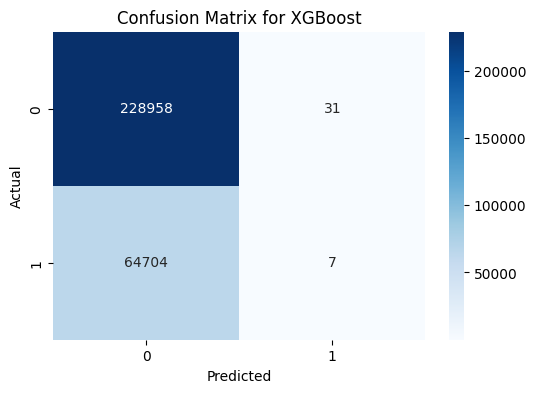

In [ ]:
# prikaz confusion matcije za XGBoost
conf_matrix_xg = confusion_matrix(y_test, xg_pred)
print("🧾 Confusion Matrix:")
print(conf_matrix_xg)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_xg, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

# inicjalizacija modela
rf_model = RandomForestClassifier(
    n_estimators=10,        # Broj stabala - koristi 10 stabala odlučivanja
    max_depth=50,           # Maksimalna dubina svakog stabla - može ići do 50 nivoa
    class_weight='balanced', # Automatski balansira klase (preživeli/nepreživeli)
    random_state=52,        # Fiksira nasumičnost za reproducibilne rezultate
    n_jobs=-1               # Koristi sve dostupne CPU jezgre za brže treniranje
)
# treniranje modela
rf_model.fit(X_train, y_train)
# predikcija
rf_predictions = rf_model.predict(X_test)

🧾 Confusion Matrix:
[[224539   4450]
 [ 63466   1245]]


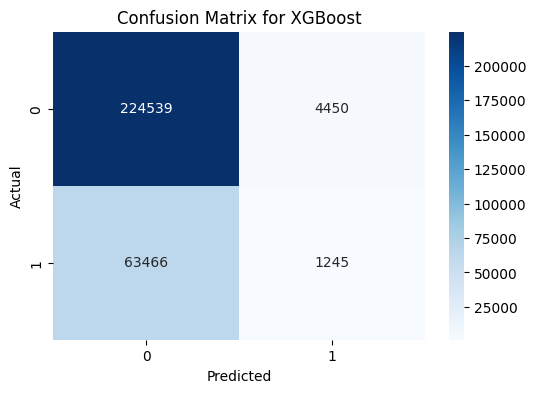

In [117]:
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
print("🧾 Confusion Matrix:")
print(conf_matrix_rf)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [88]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

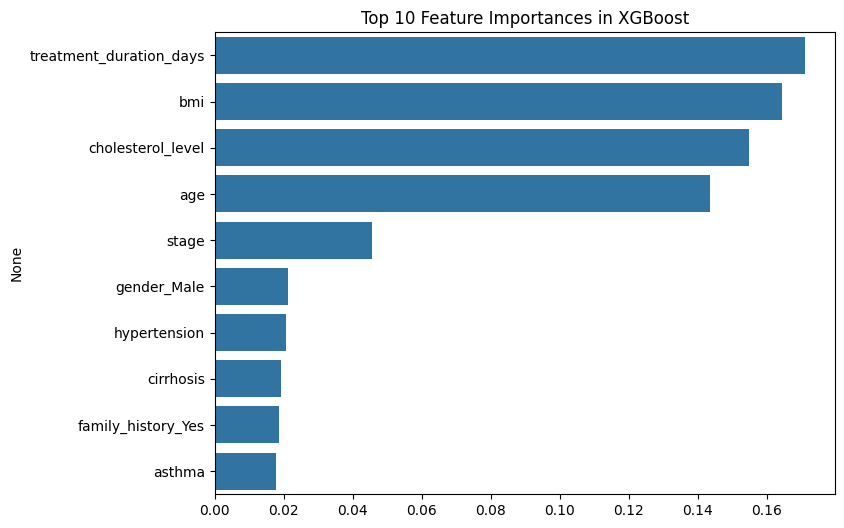

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices[:10]], y=X_train.columns[indices[:10]])
plt.title(f'Top 10 Feature Importances in XGBoost')
plt.show()